In [1]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
df = pd.read_csv('http://gosmar.eu/ml/car_estimator.csv')

In [3]:
df.head(7)

,CarBrand,Color,Year,Status,New,Value
0,Brand1,Red,1999,Bad,No,3000
1,Brand1,Blue,2005,Medium,No,5300
2,Brand2,Grey,2019,Good,Yes,18000
3,Brand3,White,2002,Bad,No,1800
4,Brand4,Green,2007,Bad,No,3750
5,Brand4,Red,2020,Good,Yes,24000
6,Brand5,Black,2003,Medium,No,6300


In [4]:
#map encoding for status
mapper = dict({'Bad':10,'Medium':20,'Good':30})
df['num_Status'] = df['Status'].map(mapper)
df.head(7)

,CarBrand,Color,Year,Status,New,Value,num_Status
0,Brand1,Red,1999,Bad,No,3000,10
1,Brand1,Blue,2005,Medium,No,5300,20
2,Brand2,Grey,2019,Good,Yes,18000,30
3,Brand3,White,2002,Bad,No,1800,10
4,Brand4,Green,2007,Bad,No,3750,10
5,Brand4,Red,2020,Good,Yes,24000,30
6,Brand5,Black,2003,Medium,No,6300,20


In [5]:
#sorting by status
dfsort = df.sort_values(['num_Status'])
dfsort.head(7)

,CarBrand,Color,Year,Status,New,Value,num_Status
0,Brand1,Red,1999,Bad,No,3000,10
3,Brand3,White,2002,Bad,No,1800,10
4,Brand4,Green,2007,Bad,No,3750,10
1,Brand1,Blue,2005,Medium,No,5300,20
6,Brand5,Black,2003,Medium,No,6300,20
2,Brand2,Grey,2019,Good,Yes,18000,30
5,Brand4,Red,2020,Good,Yes,24000,30


In [6]:
#one-hot encoding conversion for non-numerical categorical data
df=pd.get_dummies(df,columns=['Color'])
df.head(7)

,CarBrand,Year,Status,New,Value,num_Status,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_White
0,Brand1,1999,Bad,No,3000,10,False,False,False,False,True,False
1,Brand1,2005,Medium,No,5300,20,False,True,False,False,False,False
2,Brand2,2019,Good,Yes,18000,30,False,False,False,True,False,False
3,Brand3,2002,Bad,No,1800,10,False,False,False,False,False,True
4,Brand4,2007,Bad,No,3750,10,False,False,True,False,False,False
5,Brand4,2020,Good,Yes,24000,30,False,False,False,False,True,False
6,Brand5,2003,Medium,No,6300,20,True,False,False,False,False,False


In [7]:
#encode non-numeric data to numeric by using LabelEncoder
from sklearn import preprocessing
le = LabelEncoder()
le.fit(df['New'])
df['New'] = le.transform(df['New'])
df.head(7)

,CarBrand,Year,Status,New,Value,num_Status,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_White
0,Brand1,1999,Bad,0,3000,10,False,False,False,False,True,False
1,Brand1,2005,Medium,0,5300,20,False,True,False,False,False,False
2,Brand2,2019,Good,1,18000,30,False,False,False,True,False,False
3,Brand3,2002,Bad,0,1800,10,False,False,False,False,False,True
4,Brand4,2007,Bad,0,3750,10,False,False,True,False,False,False
5,Brand4,2020,Good,1,24000,30,False,False,False,False,True,False
6,Brand5,2003,Medium,0,6300,20,True,False,False,False,False,False


In [8]:
df.head(5)

,CarBrand,Year,Status,New,Value,num_Status,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_White
0,Brand1,1999,Bad,0,3000,10,False,False,False,False,True,False
1,Brand1,2005,Medium,0,5300,20,False,True,False,False,False,False
2,Brand2,2019,Good,1,18000,30,False,False,False,True,False,False
3,Brand3,2002,Bad,0,1800,10,False,False,False,False,False,True
4,Brand4,2007,Bad,0,3750,10,False,False,True,False,False,False


In [9]:
df = pd.read_csv('http://gosmar.eu/ml/car_estimator2.csv')
df

,CarBrand,Color,Year,Status,New,Value
0,Brand1,Red,1999.0,Bad,No,3000
1,Brand1,Blue,2005.0,Medium,No,5300
2,Brand2,Grey,NaN,Good,Yes,18000
3,Brand3,White,2002.0,Bad,NaN,1800
4,Brand4,Green,2007.0,Bad,No,3750
5,Brand4,NaN,2020.0,Good,Yes,24000
6,Brand5,Black,2003.0,Medium,No,6300


In [10]:
#drop rows with at least one missing value
df.dropna(axis=0,how='any',subset=None,inplace=True)
df

,CarBrand,Color,Year,Status,New,Value
0,Brand1,Red,1999.0,Bad,No,3000
1,Brand1,Blue,2005.0,Medium,No,5300
4,Brand4,Green,2007.0,Bad,No,3750
6,Brand5,Black,2003.0,Medium,No,6300


In [11]:
df = pd.read_csv('http://gosmar.eu/ml/car_estimator2.csv')

In [12]:
#drop columns with at least one missing value
df.dropna(axis=1,how='any',subset=None,inplace=True)
df

,CarBrand,Status,Value
0,Brand1,Bad,3000
1,Brand1,Medium,5300
2,Brand2,Good,18000
3,Brand3,Bad,1800
4,Brand4,Bad,3750
5,Brand4,Good,24000
6,Brand5,Medium,6300


In [13]:
df = pd.read_csv('http://gosmar.eu/ml/car_estimator3.csv')
df.head(7)

,CarBrand,Color,Year,Status,New,Value
0,Brand1,Red,1999.0,Bad,No,3000
1,Brand1,Blue,2005.0,Medium,No,5300
2,Brand2,Grey,NaN,Good,Yes,18000
3,Brand3,White,2002.0,Bad,No,1800
4,Brand4,Green,NaN,Bad,No,3750
5,Brand4,Red,2020.0,Good,Yes,24000
6,Brand5,Black,2003.0,Medium,No,6300


In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.DataFrame([["Red", "Low"], [np.nan, "High"],["Red", np.nan],["Green", "High"]], dtype="category")
df

,0,1
0,Red,Low
1,NaN,High
2,Red,NaN
3,Green,High


In [15]:
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['Red' 'Low']
 ['Red' 'High']
 ['Red' 'High']
 ['Green' 'High']]


In [16]:
df = pd.read_csv('http://gosmar.eu/ml/car_estimator4.csv')
df.head(7)

,CarBrand,Color,Year,Status,New,Value
0,Brand1,Red,1999,Bad,No,1200
1,Brand1,Blue,2005,Medium,No,5300
2,Brand2,Grey,2015,Good,Yes,18000
3,Brand3,White,2002,Bad,No,1800
4,Brand4,Green,2007,Bad,No,3750
5,Brand4,Red,2020,Good,Yes,27000
6,Brand5,Black,2003,Medium,No,6300


In [17]:
le = LabelEncoder()
le.fit(df['New'])
df['New'] = le.transform(df['New'])
df.head(7)

,CarBrand,Color,Year,Status,New,Value
0,Brand1,Red,1999,Bad,0,1200
1,Brand1,Blue,2005,Medium,0,5300
2,Brand2,Grey,2015,Good,1,18000
3,Brand3,White,2002,Bad,0,1800
4,Brand4,Green,2007,Bad,0,3750
5,Brand4,Red,2020,Good,1,27000
6,Brand5,Black,2003,Medium,0,6300


In [18]:
#Scrubbing
df.drop(["Color","Status","CarBrand"], axis = 1, inplace = True)
df

,Year,New,Value
0,1999,0,1200
1,2005,0,5300
2,2015,1,18000
3,2002,0,1800
4,2007,0,3750
5,2020,1,27000
6,2003,0,6300


In [19]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features

array([[-1.18639428, -0.63245553, -0.87283434],
       [-0.32728118, -0.63245553, -0.41695908],
       [ 1.10457398,  1.58113883,  0.99514234],
       [-0.75683773, -0.63245553, -0.80612089],
       [-0.04091015, -0.63245553, -0.58930217],
       [ 1.82050156,  1.58113883,  1.99584414],
       [-0.61365221, -0.63245553, -0.30576999]])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# Our text
text = ["Le automobili di colore rosso sono le mie automobili preferite, per le gite al mare."]
# Transform
vectorizer = CountVectorizer()
# Tokenize it and build vocabulary
vectorizer.fit(text)
# Show it
print(vectorizer.vocabulary_)

{'le': 5, 'automobili': 1, 'di': 3, 'colore': 2, 'rosso': 10, 'sono': 11, 'mie': 7, 'preferite': 9, 'per': 8, 'gite': 4, 'al': 0, 'mare': 6}


In [21]:
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.toarray())

[[1 2 1 1 1 3 1 1 1 1 1 1]]


In [22]:
df = pd.read_csv('http://gosmar.eu/ml/car_estimator4.csv')
df.head(7)

,CarBrand,Color,Year,Status,New,Value
0,Brand1,Red,1999,Bad,No,1200
1,Brand1,Blue,2005,Medium,No,5300
2,Brand2,Grey,2015,Good,Yes,18000
3,Brand3,White,2002,Bad,No,1800
4,Brand4,Green,2007,Bad,No,3750
5,Brand4,Red,2020,Good,Yes,27000
6,Brand5,Black,2003,Medium,No,6300


In [23]:
from scipy.stats import entropy
entropy([1/2, 1/2], base=2)

1.0

In [24]:
entropy([9/10, 1/10], base=2)

0.46899559358928117

In [25]:
entropy([10/10, 0/10], base=2)

0.0

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import iris dataset
iris = datasets.load_iris()
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [27]:
iris.target[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
print("iris target size: ", iris.target.size)

iris target size:  150


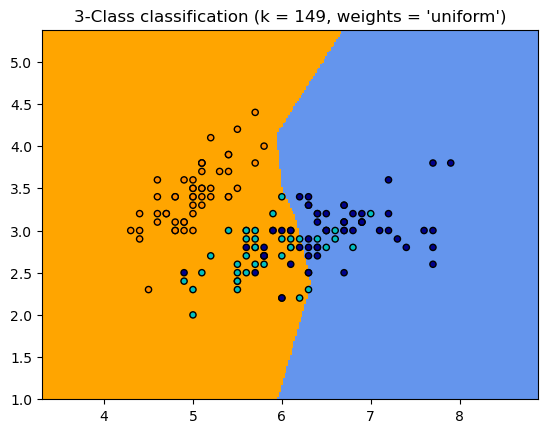

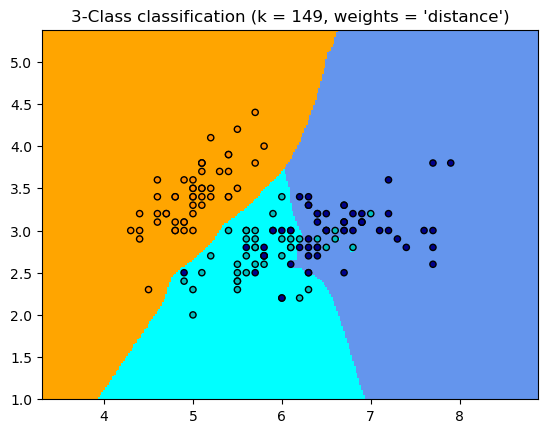

In [29]:
# Let's use only two features of the iris data
X = iris.data[:, :2]
y = iris.target

# Set the K value for K-Nearest
k_neighbors = 149

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

h = .02  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (k_neighbors, weights))

plt.show()

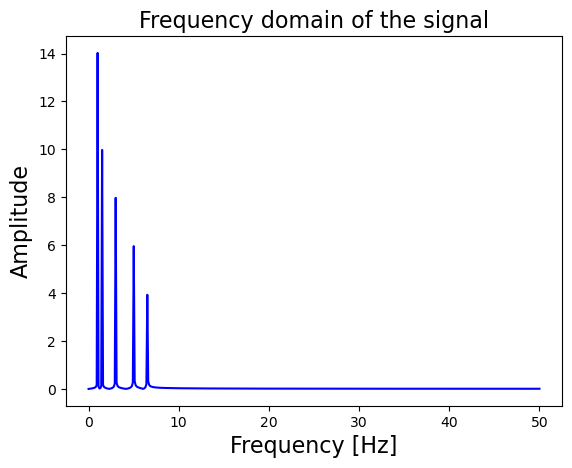

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
from scipy.fftpack import fft

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

/var/folders/nk/xzc5ynv50fx32b_xfhb7yjw00000gn/T/ipykernel_80901/795734773.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


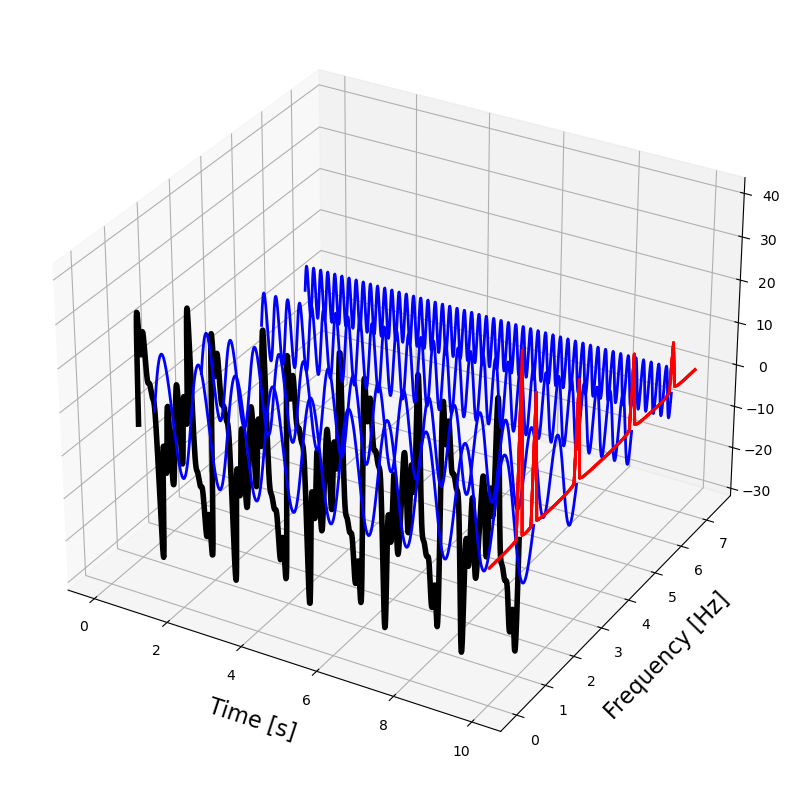

In [31]:
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)

y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]

for ii in range(0, len(y_values_) - 1):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,10,1000)
    y=np.array([frequencies[ii]]*length)
    z=signal

    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)

    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75]*3
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')
    
    plt.tight_layout()
plt.show()